# Baza dla przysiadów

1. [Opis markerów](#markery)
2. [Wykresy](#wykresy)
3. [Wykresy z normalizacją](#wykresyznormalizacja)


In [1]:
import numpy as np
from ezc3d import c3d
from pyomeca import Markers
import importlib
import os
import glob
from pathlib import Path
import dataprocesing as dp
import matplotlib.pyplot as plt

In [2]:
# importlib.reload(dp)
# destiny = r'Y:\Bazaprzysiady'
# for path in Path(r'C:\Users\Grafika Multimedia\Desktop\folder').rglob('*.c3d'):
#     czas = dp.read_labels(str(path),100)
#     temp = []
#     for i in range(len(czas[0])):
#         if czas[0][i] != 0 and czas[1][i] != 0:
#             temp.append([int(czas[0][i]), int(czas[1][i])])  
#     dp.cropp_c3dfile(temp, str(path), str(destiny))


In [3]:
# czas

Markery <a name="markery"></a>

        Dłonie/Ramiona
        m10 - Left Shoulder LSHO
        m11 - Left Upper Arm LUPA
        m12 - Left Elbow LELB
        m13 - Left Forearm LFRM
        m14 - Left Wrist Marker A LWRA
        m15 - Left Wrist Marker B LWRB
        m16 - Left Finger LFIN
        m17 - Right Shoulder RSHO
        m18 - Right Upper Arm RUPA
        m19 - Right Elbow RELB
        m20 - Right Forearm RFRM
        m21 - Right Wrist Marker A RWRA
        m22 - Right Wrist Marker B RWRB
        m23 - Right Finger RFIN  
        Miednica
        m24 - Left Anterior Superior Iliac LASI
        m25 - Right Anterior Superior Iliac RASI
        m26 - Left Posterior Superior Iliac LPSI
        m27 - Right Posterior Superior Iliac RPSI
        m29 - Left Knee LKNE
        Stopy
        m30 - Left Tibia LTIB
        m31 - Left Ankle LANK
        m32 - Left Heel LHEE
        m33 - Left Toe LTOE
        m35 - Right Knee RKNE
        m36 - Right Tibia RTIB
        m37 - Right Ankle RANK
        m38 - Right Heel RHEE
        m39 - Right Toe RTOE


In [4]:
# importlib.reload(dp)
# data_path1 = r'C:\Users\Grafika Multimedia\Desktop\Baza\B0436-PrzysiadNieprawidlowy-ObciazenieGrzejnik-T01-K1.c3d'
# data_path = r'C:\Users\Grafika Multimedia\Desktop\Baza\B0436-PrzysiadNieprawidlowy-T01-K1.c3d'
# c = c3d(data_path)
# markers = ['LSHO','LUPA','LELB','LFRM','LWRA','LWRB','LFIN','RSHO','RUPA','RELB','RFRM', 'RWRA','RWRB','RFIN','LASI',
#            'RASI','LPSI','RPSI','LKNE','LTIB','LANK','LHEE','LTOE','RKNE','RTIB','RANK','RHEE','RTOE']

In [5]:
# print(f"Number of points = {c['parameters']['POINT']['LABELS']['value']}")

In [6]:
# import dataprocesing as dp
# def wykresy_markerow(path):
#     c = c3d(path)
#     markers = ['LHEE']
# #     markers = ['LSHO','LUPA','LELB','LFRM','LWRA','LWRB','LFIN','RSHO','RUPA','RELB','RFRM', 'RWRA','RWRB','RFIN','LASI',
# #            'RASI','LPSI','RPSI','LKNE','LTIB','LANK','LHEE','LTOE','RKNE','RTIB','RANK','RHEE','RTOE']
    
#     for mark in markers:
#         n = c['parameters']['POINT']['LABELS']['value'].index(mark) 
#         name=c['parameters']['POINT']['LABELS']['value'][n]
#         axes = ["Os x markera " +name,"Oś y markera "+name,"Oś z markera "+name]
#         for i in range(2):
#             for j in range(3)):
#                 plt.plot(c['data']['points'][i][n])
#             plt.title(axes[i])
#             plt.show()

In [7]:
# wykresy_markerow(data_path)


In [8]:
# c = c3d(data_path)

## Naprawione odczytuje dla obu typów markerów (LTOE ORAZ B0433:LTOE)

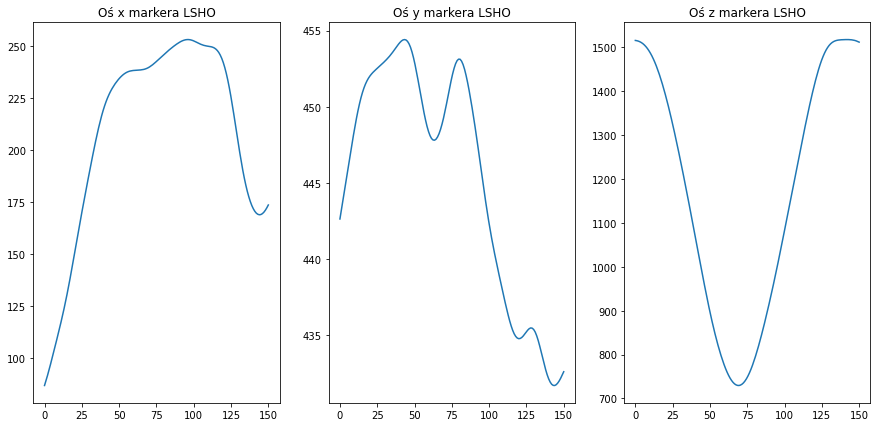

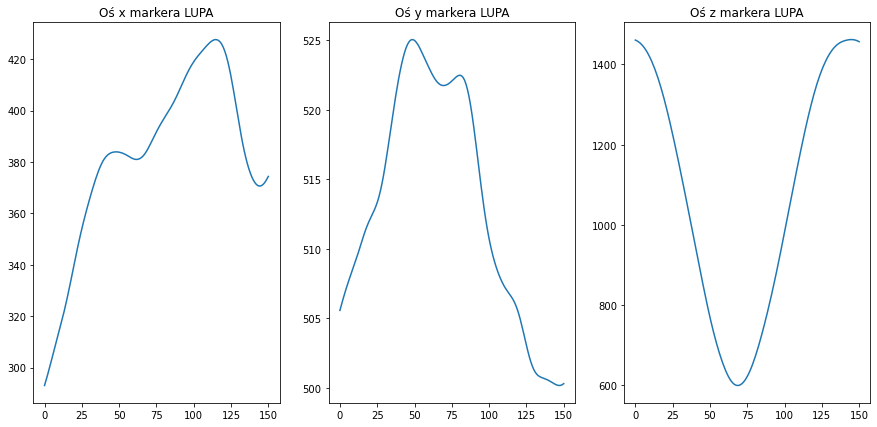

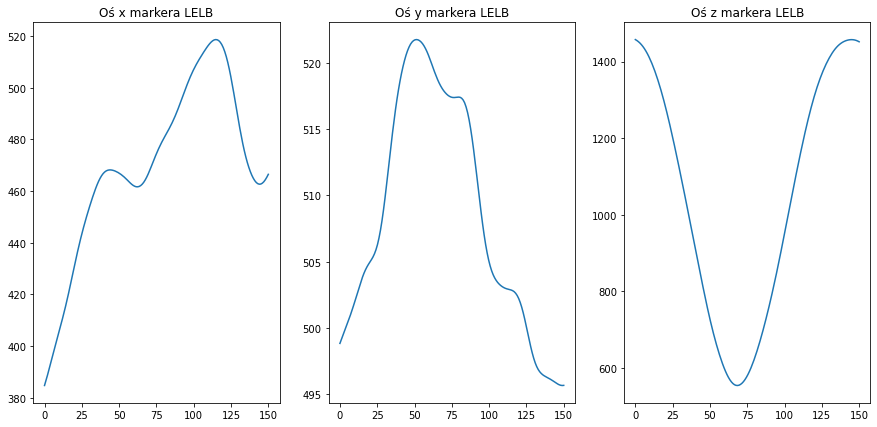

In [9]:
importlib.reload(dp)
from pyomeca import Markers
plt.rcParams.update({'figure.max_open_warning': 0})

markers = ['LSHO','LUPA','LELB']
# markers = ['LSHO','LUPA','LELB','LFRM','LWRA','LWRB','LFIN','RSHO','RUPA','RELB','RFRM', 'RWRA','RWRB','RFIN','LASI',
#             'RASI','LPSI','RPSI','LKNE','LTIB','LANK','LHEE','LTOE','RKNE','RTIB','RANK','RHEE','RTOE']
data_path = r'Y:\Bazaprzysiady\B0437-PrzysiadNieprawidlowy-T02-K6.c3d'
data_path1 = r'C:\Users\Grafika Multimedia\Desktop\Baza\B0436-PrzysiadNieprawidlowy-Obciazenie-T02-K1.c3d'
x = data_path.find("Obciazenie")
if x> -1:  
    body = data_path.split('-')[0].split('\\')[-1]+":"
    for i in range(len(markers)):
        markers[i] = body+markers[i]
    
    

c = c3d(data_path)

k=c['parameters']['POINT']['FRAMES']['value'][0]


i=0
for mark in markers:
    c=mark.index
    markers2 = Markers.from_c3d(data_path, usecols=markers)
    time_normalized=markers2.meca.time_normalize(n_frames=150)
    x=np.linspace(0,150, 150)
    fig, axs = plt.subplots(1, 3, figsize=(15, 7))
    axs[0].set_title('Oś x markera '+mark)
    axs[1].set_title('Oś y markera '+mark)
    axs[2].set_title('Oś z markera '+mark)
    axs[0].plot(x,time_normalized[0][i])
    axs[1].plot(x,time_normalized[1][i])
    axs[2].plot(x,time_normalized[2][i])
    i=i+1
plt.show()    

In [10]:
time_normalized.shape

(4, 3, 150)

In [11]:

data_path1 = r'C:\Users\Grafika Multimedia\Desktop\Baza\B0436-PrzysiadNieprawidlowy-T01-K1.c3d'
data_path = r'C:\Users\Grafika Multimedia\Desktop\Baza\B0436-PrzysiadNieprawidlowy-Obciazenie-T02-K1.c3d'
x = data_path.find("Obciazenisdasdasdfe")

In [12]:
print(x)

-1


In [13]:
markers = ['LSHO','LUPA','LELB','LFRM','LWRA','LWRB','LFIN','RSHO','RUPA','RELB','RFRM', 'RWRA','RWRB','RFIN','LASI',
            'RASI','LPSI','RPSI','LKNE','LTIB','LANK','LHEE','LTOE','RKNE','RTIB','RANK','RHEE','RTOE']
body = data_path.split('-')[0].split('\\')[-1]+":"

In [14]:
print(body)

B0436:


In [15]:
for i in range(len(markers)):
    markers[i] = body+markers[i]
    

In [16]:
markers[0]

'B0436:LSHO'

In [17]:
def przysiad(data_path):
    importlib.reload(dp)
    from pyomeca import Markers
    plt.rcParams.update({'figure.max_open_warning': 0})

    markers = ['LSHO','LUPA']
#     markers = ['LSHO','LUPA','LELB','LFRM','LWRA','LWRB','LFIN','RSHO','RUPA','RELB','RFRM', 'RWRA','RWRB','RFIN','LASI',
#                 'RASI','LPSI','RPSI','LKNE','LTIB','LANK','LHEE','LTOE','RKNE','RTIB','RANK','RHEE','RTOE']
#     data_path = r'Y:\Bazaprzysiady\B0437-PrzysiadNieprawidlowy-T02-K6.c3d'
    data_path1 = r'C:\Users\Grafika Multimedia\Desktop\Baza\B0436-PrzysiadNieprawidlowy-Obciazenie-T02-K1.c3d'
    x = data_path.find("Obciazenie")
    if x> -1:  
        body = data_path.split('-')[0].split('\\')[-1]+":"
        for i in range(len(markers)):
            markers[i] = body+markers[i]
            
    i=0
    title = ['Oś x markera ','Oś y markera','Oś z markera']
    for mark in markers:
#         c=mark.index
        markers2 = Markers.from_c3d(data_path, usecols=markers)
        time_normalized=markers2.meca.time_normalize(n_frames=150)
        x=np.linspace(0,150, 150)
        fig, axs = plt.subplots(1, 3, figsize=(15, 7))
        for j in range(3):
            axs[j].set_title(title[j]+mark)
            axs[j].plot(x,time_normalized[j][i])
 
        i=i+1


Wykresy <a name="wykresy"></a>

Y:\Bazaprzysiady\B0436-PrzysiadNieprawidlowy-T02-K1.c3d
Y:\Bazaprzysiady\B0436-PrzysiadNieprawidlowy-T02-K10.c3d
Y:\Bazaprzysiady\B0436-PrzysiadNieprawidlowy-T02-K2.c3d
Y:\Bazaprzysiady\B0436-PrzysiadNieprawidlowy-T02-K3.c3d
Y:\Bazaprzysiady\B0436-PrzysiadNieprawidlowy-T02-K4.c3d
Y:\Bazaprzysiady\B0436-PrzysiadNieprawidlowy-T02-K5.c3d
Y:\Bazaprzysiady\B0436-PrzysiadNieprawidlowy-T02-K6.c3d
Y:\Bazaprzysiady\B0436-PrzysiadNieprawidlowy-T02-K7.c3d
Y:\Bazaprzysiady\B0436-PrzysiadNieprawidlowy-T02-K8.c3d
Y:\Bazaprzysiady\B0436-PrzysiadNieprawidlowy-T02-K9.c3d
Y:\Bazaprzysiady\B0437-PrzysiadNieprawidlowy-T02-K1.c3d
Y:\Bazaprzysiady\B0437-PrzysiadNieprawidlowy-T02-K2.c3d
Y:\Bazaprzysiady\B0437-PrzysiadNieprawidlowy-T02-K3.c3d
Y:\Bazaprzysiady\B0437-PrzysiadNieprawidlowy-T02-K4.c3d
Y:\Bazaprzysiady\B0437-PrzysiadNieprawidlowy-T02-K5.c3d
Y:\Bazaprzysiady\B0437-PrzysiadNieprawidlowy-T02-K6.c3d
Y:\Bazaprzysiady\B0437-PrzysiadNieprawidlowy-T02-K7.c3d
Y:\Bazaprzysiady\B0437-PrzysiadNieprawidlowy-T0

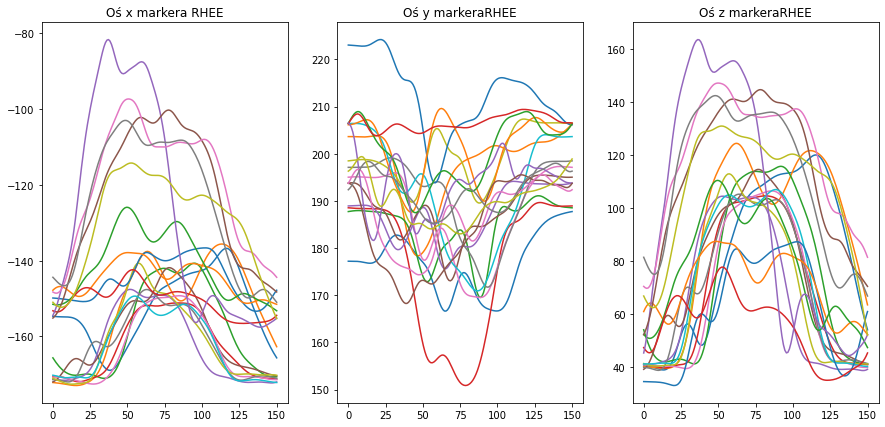

In [141]:
from pyomeca import Markers
import glob
osoba="\B0436"


x=  r"Y:\Bazaprzysiady"+osoba
stale="-PrzysiadNieprawidlowy-T02"
stale2="*.c3d"
path=x+stale+stale2
importlib.reload(dp)

# plt.rcParams.update({'figure.max_open_warning': 0})

markers = ['RHEE']
#     markers = ['LSHO','LUPA','LELB','LFRM','LWRA','LWRB','LFIN','RSHO','RUPA','RELB','RFRM', 'RWRA','RWRB','RFIN','LASI',
#                 'RASI','LPSI','RPSI','LKNE','LTIB','LANK','LHEE','LTOE','RKNE','RTIB','RANK','RHEE','RTOE']


title = ['Oś x markera ','Oś y markera','Oś z markera']
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
x=np.linspace(0,150, 150)

for name in glob.glob(path,recursive = True):
    print(name)
    c=name.find('Obciazenie')
    if c>-1:
        body=name.split('-')[0].split('\\')[-1]+":"
        for i in range(len(markers)):
            markers[i] = body+markers[i]
            print(body)
    markers2 = Markers.from_c3d(name, usecols=markers)
    time_normalized=markers2.meca.time_normalize(n_frames=150)
    for mark in markers:
        for i in range(3):
            axs[i].set_title(title[i]+mark)
            axs[i].plot(x,time_normalized[i][markers.index(mark)])
plt.show()


In [ ]:
przysiad(r'Y:\Bazaprzysiady\B0436-PrzysiadPrawidlowy-T01-K1.c3d')

Wykresy z normalizacją <a name="wykresyznormalizacja"></a>

# wywołując funkcję wybieramy: 
# osobę,   
# nazwę markera,
# prawidlowy/nieprawidlowy(jezeli prawidlowy podac 1),
# obciazenie(jezeli tak podac 1)



In [251]:
from pyomeca import Markers
import glob

def rysowanieprzysiadynorm(person,marker,poprawnosc,obciazenie):
    """
    Funkcja do wyświetlania wykresów markerów wybranego ćwiczenia 
    
    Przykład wywołania rysowanieprzysiadynorm('B0437','RWRB',1,0)
    
    Input:
    - person - wybor osoby('B0436'/'B0437')(zostaw * dla wszystkich)
    - marker - wybrany marker do wyświetlenia('LSHO')
    - poprawnosc - wybierz 1 aby wyświetlić wykresy dla poprawnych ćwiczeń lub 0 dla niepoprawnych
    - obciazenie - wybierz 1 aby wyświetlić ćwiczenia z obciązeniem lub 0 dla cwiczen bez obciazenia
    Output:
    - Wykresy położenia markerów w 3 osiach

    """
    osoba=person
    x=  r"Y:\Bazaprzysiady\\"+osoba
    if poprawnosc==1:
        popr="*dPrawidlowy-"
    else:
        popr="*NiePrawidlowy-"
    
    if obciazenie==1:
        obc="*Obciazenie*"
    else:
        obc="T*"
    
    stale2="*.c3d"
    path=x+popr+obc+stale2
    importlib.reload(dp)
    markers = [marker]
    #     markers = ['LSHO','LUPA','LELB','LFRM','LWRA','LWRB','LFIN','RSHO','RUPA','RELB','RFRM', 'RWRA','RWRB','RFIN','LASI',
    #                 'RASI','LPSI','RPSI','LKNE','LTIB','LANK','LHEE','LTOE','RKNE','RTIB','RANK','RHEE','RTOE']

    title = ['Oś x markera ','Oś y markera ','Oś z markera ']
    fig, axs = plt.subplots(1, 3, figsize=(15, 7))
    x=np.linspace(0,150, 150)

    for name in glob.glob(path,recursive = True):
        print(name)
        c=name.find('Obciazenie')
        body=name.split('-')[0].split('\\')[-1]+":"
        if c>-1:
            if (markers[0].find(body)) == -1:
                for i in range(len(markers)):
                    markers[i] = body+markers[i]        
        markers2 = Markers.from_c3d(name, usecols=markers)
        normalized = markers2.meca.square()
        normalized = normalized.meca.normalize(scale=1)
        time_normalized=normalized.meca.time_normalize(n_frames=150)
        markers = [marker]
        for mark in markers:
            for i in range(3):
                axs[i].set_title(title[i]+mark)
                axs[i].plot(x,time_normalized[i][markers.index(mark)])
    plt.show()


Y:\Bazaprzysiady\B0436-PrzysiadPrawidlowy-T01-K1.c3d
Y:\Bazaprzysiady\B0436-PrzysiadPrawidlowy-T01-K10.c3d
Y:\Bazaprzysiady\B0436-PrzysiadPrawidlowy-T01-K2.c3d
Y:\Bazaprzysiady\B0436-PrzysiadPrawidlowy-T01-K3.c3d
Y:\Bazaprzysiady\B0436-PrzysiadPrawidlowy-T01-K4.c3d
Y:\Bazaprzysiady\B0436-PrzysiadPrawidlowy-T01-K5.c3d
Y:\Bazaprzysiady\B0436-PrzysiadPrawidlowy-T01-K6.c3d
Y:\Bazaprzysiady\B0436-PrzysiadPrawidlowy-T01-K7.c3d
Y:\Bazaprzysiady\B0436-PrzysiadPrawidlowy-T01-K8.c3d
Y:\Bazaprzysiady\B0436-PrzysiadPrawidlowy-T01-K9.c3d
Y:\Bazaprzysiady\B0437-PrzysiadPrawidlowy-T01-K1.c3d
Y:\Bazaprzysiady\B0437-PrzysiadPrawidlowy-T01-K2.c3d
Y:\Bazaprzysiady\B0437-PrzysiadPrawidlowy-T01-K3.c3d
Y:\Bazaprzysiady\B0437-PrzysiadPrawidlowy-T01-K4.c3d
Y:\Bazaprzysiady\B0437-PrzysiadPrawidlowy-T01-K5.c3d
Y:\Bazaprzysiady\B0437-PrzysiadPrawidlowy-T02-K1.c3d
Y:\Bazaprzysiady\B0437-PrzysiadPrawidlowy-T02-K10.c3d
Y:\Bazaprzysiady\B0437-PrzysiadPrawidlowy-T02-K2.c3d
Y:\Bazaprzysiady\B0437-PrzysiadPrawidlowy-T0

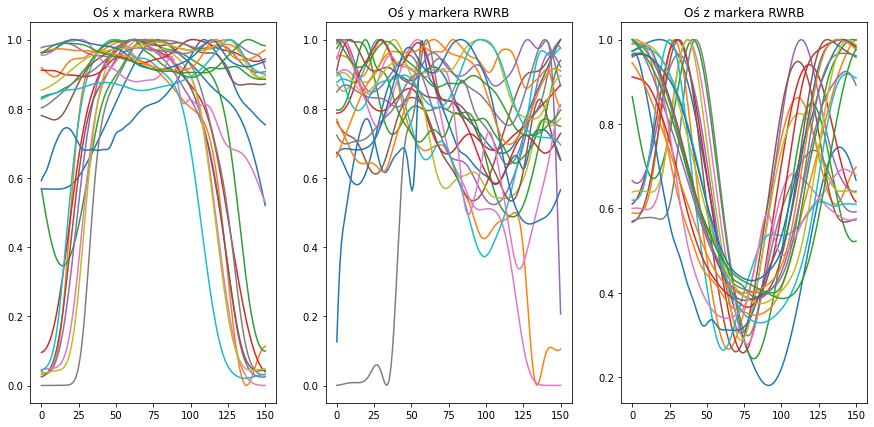

In [254]:
rysowanieprzysiadynorm('*','RWRB',1,0)

In [253]:
help(rysowanieprzysiadynorm)

Help on function rysowanieprzysiadynorm in module __main__:

rysowanieprzysiadynorm(person, marker, poprawnosc, obciazenie)
    Funkcja do wyświetlania wykresów markerów wybranego ćwiczenia 
    
    Przykład wywołania rysowanieprzysiadynorm('B0437','RWRB',1,0)
    
    Input:
    - person - wybor osoby('B0436'/'B0437')(zostaw * dla wszystkich)
    - marker - wybrany marker do wyświetlenia('LSHO')
    - poprawnosc - wybierz 1 aby wyświetlić wykresy dla poprawnych ćwiczeń lub 0 dla niepoprawnych
    - obciazenie - wybierz 1 aby wyświetlić ćwiczenia z obciązeniem lub 0 dla cwiczen bez obciazenia
    Output:
    - Wykresy położenia markerów w 3 osiach

